## Linear Regression Using the Ames Housing Data

Using the Ames Housing Data:

Dean De Cock
Truman State University
Journal of Statistics Education Volume 19, Number 3(2011), www.amstat.org/publications/jse/v19n3/decock.pdf



In this notebook, we will build some linear regression models to predict housing prices from this data.  We will split our data into training and test sets, build various models on the training data and compare their results on the test set. We will examine metrics such as *mean squared error* and *mean absolute deviation*.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import ml_insights as mli

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, LassoCV

/Applications/anaconda/envs/py3env/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Load the Data, Examine and Explore

In [2]:
## Load in the Ames Housing Data
datafile = "data/Ames_Housing_Data.tsv"
df=pd.read_csv(datafile, sep='\t')

In [3]:
## Examine the columns, look at missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [4]:
# This is recommended by the data set author to remove a few outliers

df = df.loc[df['Gr Liv Area']<=4000,:]
df.shape

(2925, 82)

There are a *lot* of variables, many of which have a lot of missing values.  Let's pick out just a few columns and start building models using that.

In [5]:
smaller_df= df.loc[:,['Lot Area','Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add',
        'Gr Liv Area', 
        'Full Bath', 'Bedroom AbvGr',
        'Fireplaces', 'Garage Cars','SalePrice']]

In [6]:
smaller_df.describe()

Lot Area  Overall Qual  Overall Cond   Year Built  Year Remod/Add  \
count    2925.000000   2925.000000   2925.000000  2925.000000     2925.000000   
mean    10103.583590      6.088205      5.563761  1971.302906     1984.234188   
std      7781.999124      1.402953      1.112262    30.242474       20.861774   
min      1300.000000      1.000000      1.000000  1872.000000     1950.000000   
25%      7438.000000      5.000000      5.000000  1954.000000     1965.000000   
50%      9428.000000      6.000000      5.000000  1973.000000     1993.000000   
75%     11515.000000      7.000000      6.000000  2001.000000     2004.000000   
max    215245.000000     10.000000      9.000000  2010.000000     2010.000000   

       Gr Liv Area    Full Bath  Bedroom AbvGr   Fireplaces  Garage Cars  \
count  2925.000000  2925.000000    2925.000000  2925.000000  2924.000000   
mean   1493.978803     1.564786       2.853675     0.596923     1.765048   
std     486.273646     0.551386       0.827737     0.645349     0.759834   
min     334.000000     0.000000       0.000000     0.000000     0.000000   
25%    1126.000000     1.000000       2.000000     0.000000     1.000000   
50%    1441.000000     2.000000       3.000000     1.000000     2.000000   
75%    1740.000000     2.000000       3.000000     1.000000     2.000000   
max    3820.000000     4.000000       8.000000     4.000000     5.000000   

           SalePrice  
count    2925.000000  
mean   180411.574701  
std     78554.857286  
min     12789.000000  
25%    129500.000000  
50%    160000.000000  
75%    213500.000000  
max    625000.000000

In [7]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
Lot Area          2925 non-null int64
Overall Qual      2925 non-null int64
Overall Cond      2925 non-null int64
Year Built        2925 non-null int64
Year Remod/Add    2925 non-null int64
Gr Liv Area       2925 non-null int64
Full Bath         2925 non-null int64
Bedroom AbvGr     2925 non-null int64
Fireplaces        2925 non-null int64
Garage Cars       2924 non-null float64
SalePrice         2925 non-null int64
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


In [8]:
# There appears to be one NA in Garage Cars - fill with 0
smaller_df = smaller_df.fillna(0)

In [9]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
Lot Area          2925 non-null int64
Overall Qual      2925 non-null int64
Overall Cond      2925 non-null int64
Year Built        2925 non-null int64
Year Remod/Add    2925 non-null int64
Gr Liv Area       2925 non-null int64
Full Bath         2925 non-null int64
Bedroom AbvGr     2925 non-null int64
Fireplaces        2925 non-null int64
Garage Cars       2925 non-null float64
SalePrice         2925 non-null int64
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


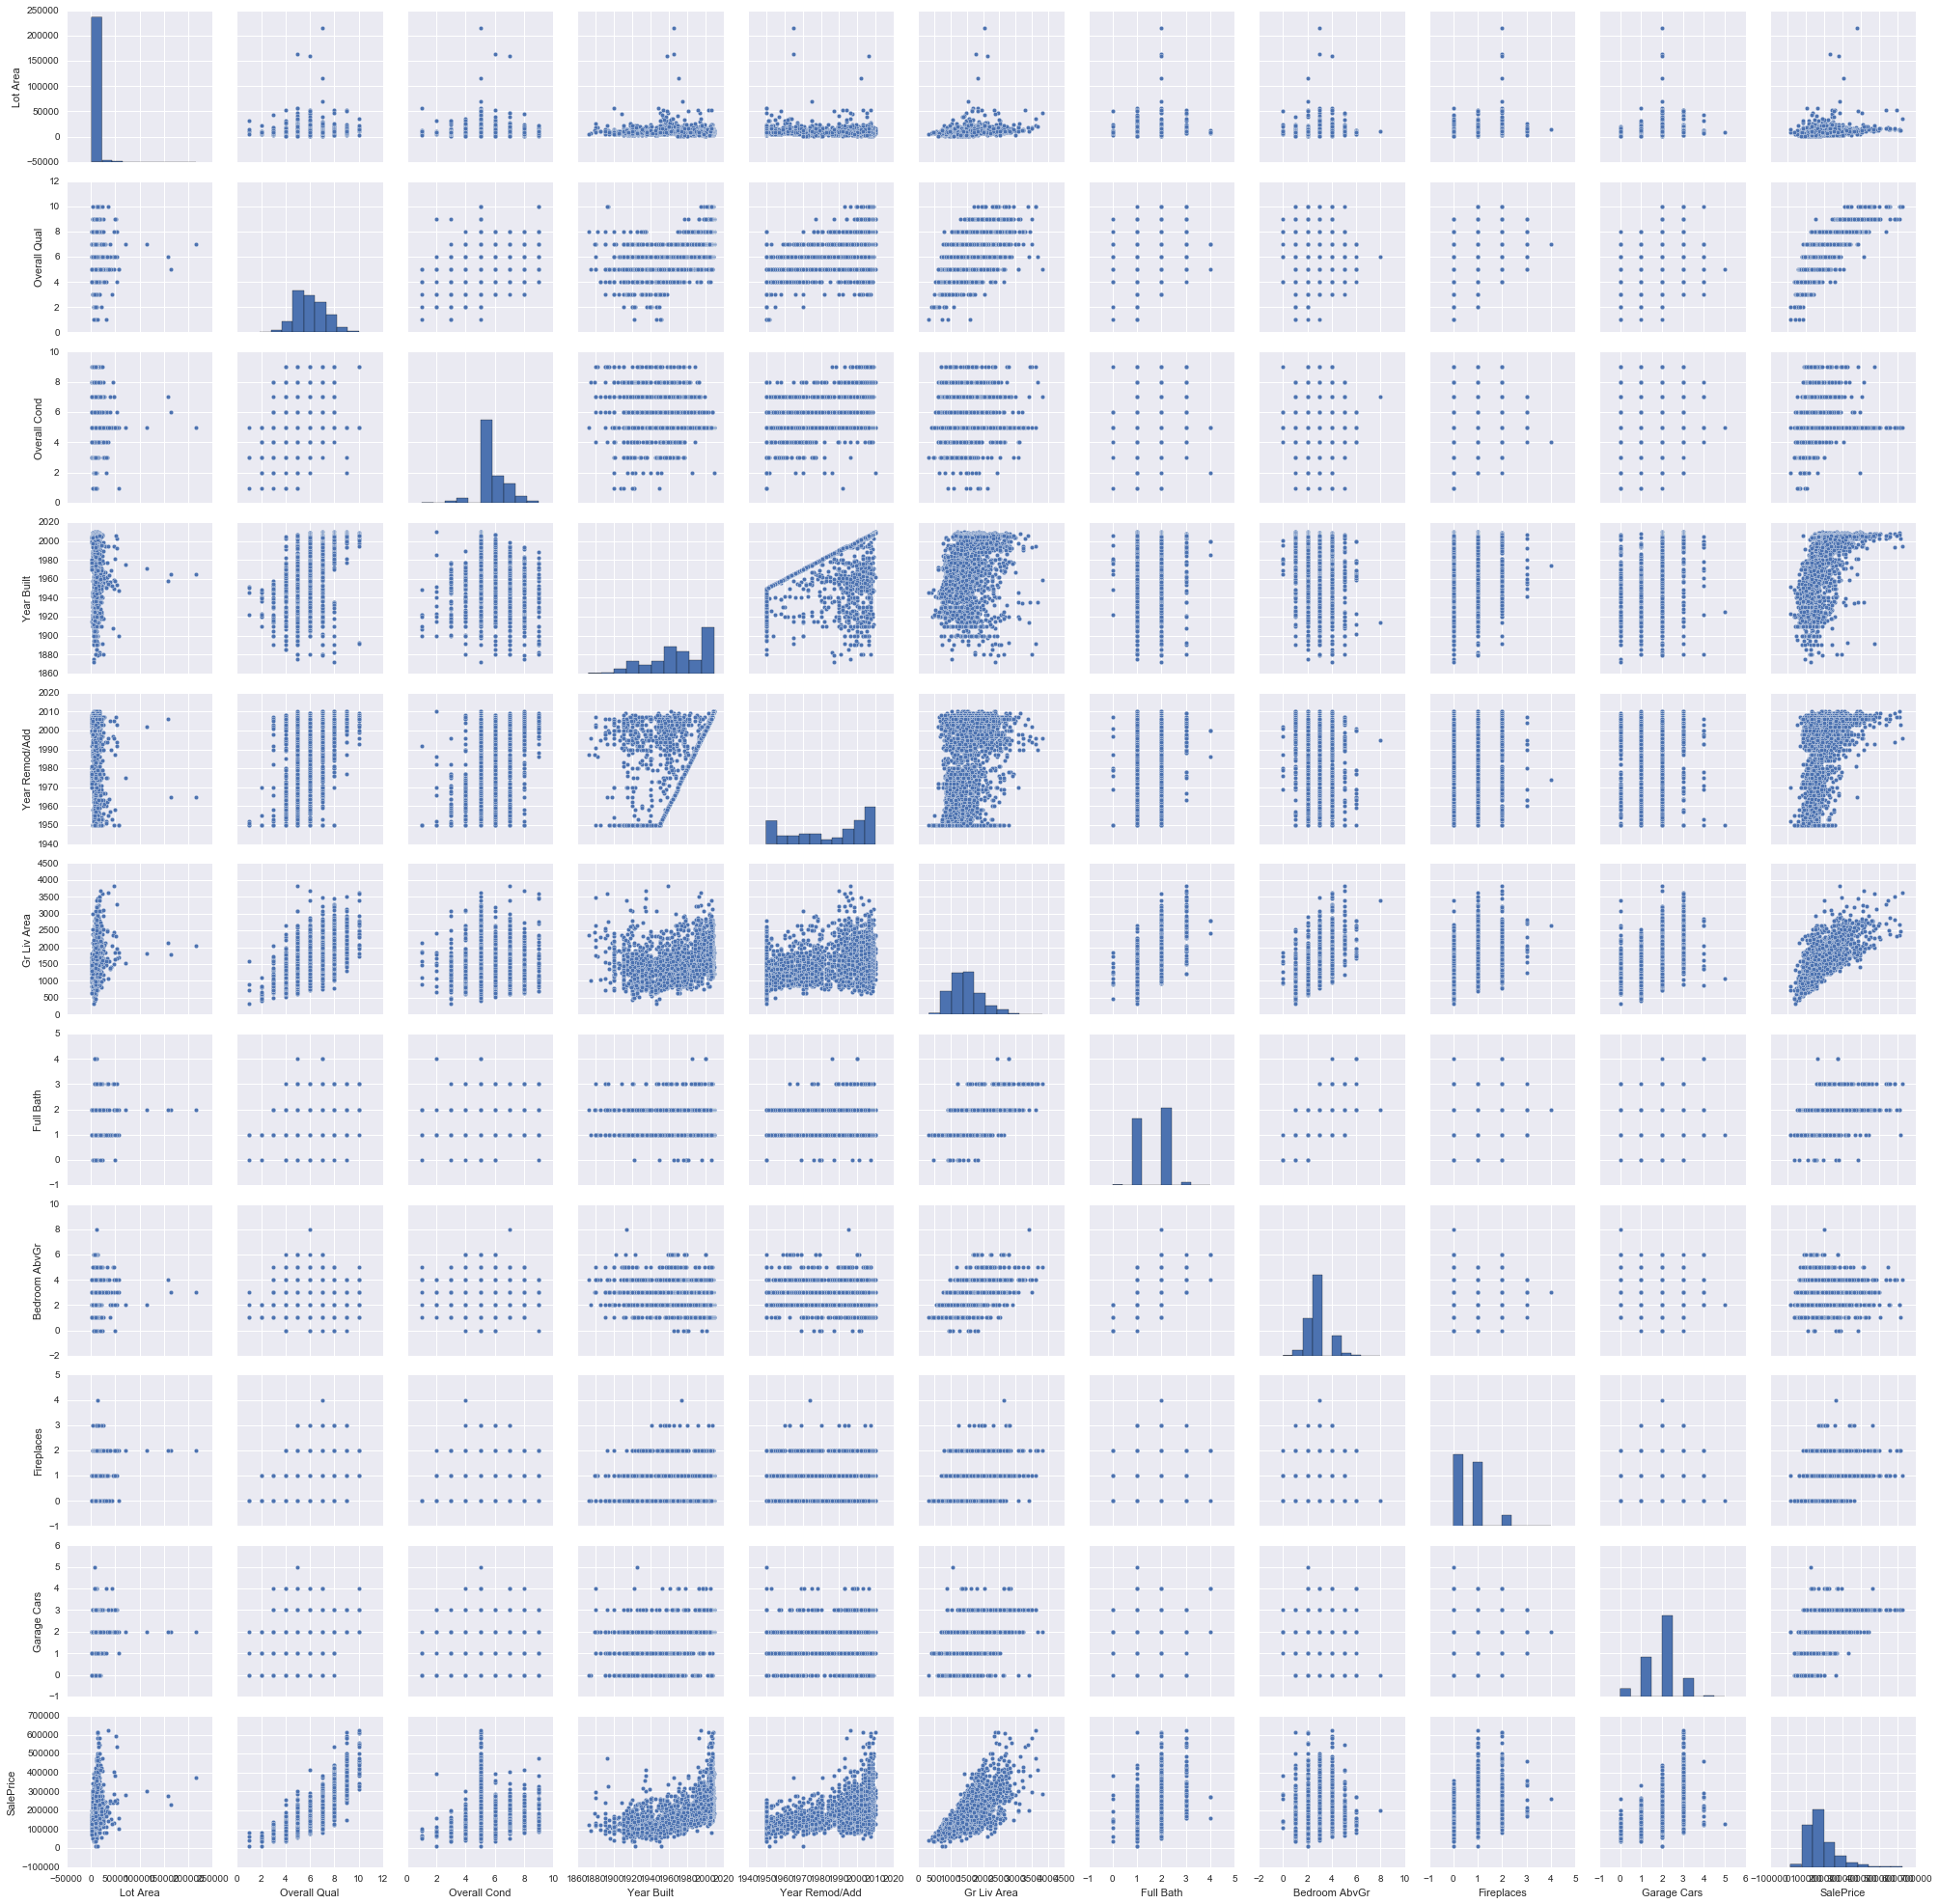

In [10]:
sns.pairplot(smaller_df)

### Data Exploration Questions
1. Which variables seem to have strong relationships with Sales Price?
1. The scatterplots of Year Built vs Year Add/Remod have an interesting structure.  Can you explain what is going on there?
1. In the plot of "Lot Area" vs. "SalePrice", some outliers are making the plot less visually useful.  How can we make the plot look better?

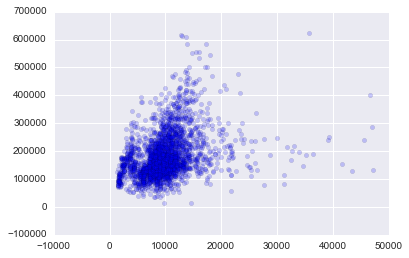

In [11]:
plt.scatter(smaller_df.loc[smaller_df['Lot Area']<50000,'Lot Area'], smaller_df.loc[smaller_df['Lot Area']<50000,'SalePrice'], alpha=.2)

In [12]:
#Separate our features from our target

X=smaller_df.loc[:,['Lot Area','Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add',
        'Gr Liv Area', 
        'Full Bath', 'Bedroom AbvGr',
        'Fireplaces', 'Garage Cars']]

y=smaller_df['SalePrice']

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 10 columns):
Lot Area          2925 non-null int64
Overall Qual      2925 non-null int64
Overall Cond      2925 non-null int64
Year Built        2925 non-null int64
Year Remod/Add    2925 non-null int64
Gr Liv Area       2925 non-null int64
Full Bath         2925 non-null int64
Bedroom AbvGr     2925 non-null int64
Fireplaces        2925 non-null int64
Garage Cars       2925 non-null float64
dtypes: float64(1), int64(9)
memory usage: 251.4 KB


In [14]:
#Split the data 70-30 train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [15]:
X_train.columns

Index(['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
       'Fireplaces', 'Garage Cars'],
      dtype='object')

## One Variable Linear Regression
To begin, we will do a simple one variable linear regression, predicting the Sales Price using the Square Footage (Gr Liv Area) of the house.

In [16]:
# First let us fit only on Living Area (sqft)
selected_columns_1 = ['Gr Liv Area']

In [17]:
lr_model1 = LinearRegression()
lr_model1.fit(X_train.loc[:,selected_columns_1],y_train)

/Applications/anaconda/envs/py3env/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
lr_model1.coef_, lr_model1.intercept_

(array([ 112.05335187]), 12169.835728455422)

### Comprehension Question
What do the coefficients above represent?  How can they be interpreted?

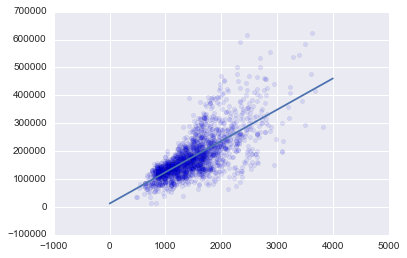

In [19]:
plt.scatter(X_train['Gr Liv Area'],y_train,alpha=.1)
vec1 = np.linspace(0,4000,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1)

In [20]:
### Get the predictions on the training set
train_set_pred1 = lr_model1.predict(X_train.loc[:,selected_columns_1])

In [21]:
### Get the predictions on the test set
test_set_pred1 = lr_model1.predict(X_test.loc[:,selected_columns_1])

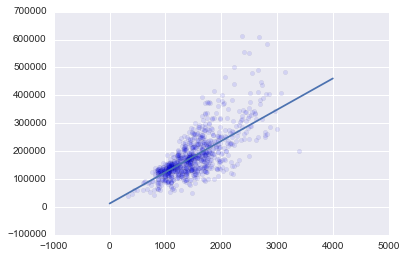

In [22]:
### Plot the regression line on top of the data

plt.scatter(X_test['Gr Liv Area'],y_test,alpha=.1)
vec1 = np.linspace(0,4000,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1)

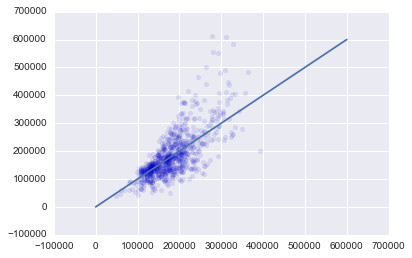

In [23]:
## Plot predicted vs actual 

plt.scatter(test_set_pred1,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))

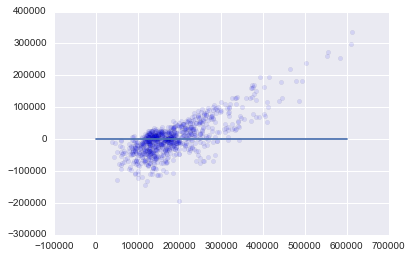

In [24]:
## Residual Plot
## Plot predicted vs actual 

plt.scatter(y_test,y_test-test_set_pred1,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))

In [25]:
# How good is our model on the test set?

# Root Mean Square Error
np.sqrt(np.mean((test_set_pred1 - y_test)**2))

55396.914785455971

In [26]:
# Mean Absolute Deviation
(np.mean(np.abs(test_set_pred1 - y_test)))

38254.522567937987

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
np.sqrt(mean_squared_error(y_test, test_set_pred1)), mean_absolute_error(y_test,test_set_pred1)

(55396.914785455971, 38254.522567937987)

### Multiple Linear Regression
We will now do a regression on several variables.  We will no longer be able to see the regression line so simply in a graph, but we can still look at the predicted vs actual and residual plots

In [29]:
selected_columns_2 = ['Lot Area', 'Overall Qual', 'Year Built', 'Gr Liv Area']

In [30]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train.loc[:,selected_columns_2],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
lr_model2.coef_

array([  1.56256997e+00,   2.58564462e+04,   5.19205946e+02,
         5.78490930e+01])

In [32]:
lr_model2.intercept_

-1102707.3312555577

In [33]:
list(zip(selected_columns_2,lr_model2.coef_))

[('Lot Area', 1.5625699653791214),
 ('Overall Qual', 25856.446165844023),
 ('Year Built', 519.20594585521542),
 ('Gr Liv Area', 57.849092972123586)]

### Comprehension Question
What do these coefficients mean?  Why does `'Gr Liv Area'` have a different coefficient this time?

In [34]:
X.corr()

Lot Area  Overall Qual  Overall Cond  Year Built  \
Lot Area        1.000000      0.083256     -0.032795    0.017049   
Overall Qual    0.083256      1.000000     -0.093902    0.596621   
Overall Cond   -0.032795     -0.093902      1.000000   -0.368533   
Year Built      0.017049      0.596621     -0.368533    1.000000   
Year Remod/Add  0.015887      0.569498      0.048356    0.611444   
Gr Liv Area     0.258529      0.564797     -0.116169    0.239305   
Full Bath       0.121394      0.518713     -0.214322    0.468485   
Bedroom AbvGr   0.138169      0.061772     -0.006207   -0.055650   
Fireplaces      0.247698      0.387174     -0.030648    0.167803   
Garage Cars     0.176047      0.598127     -0.181384    0.537146   

                Year Remod/Add  Gr Liv Area  Full Bath  Bedroom AbvGr  \
Lot Area              0.015887     0.258529   0.121394       0.138169   
Overall Qual          0.569498     0.564797   0.518713       0.061772   
Overall Cond          0.048356    -0.116169  -0.214322      -0.006207   
Year Built            0.611444     0.239305   0.468485      -0.055650   
Year Remod/Add        1.000000     0.318860   0.456708      -0.021801   
Gr Liv Area           0.318860     1.000000   0.637511       0.534222   
Full Bath             0.456708     0.637511   1.000000       0.358727   
Bedroom AbvGr        -0.021801     0.534222   0.358727       1.000000   
Fireplaces            0.130699     0.449018   0.225748       0.075856   
Garage Cars           0.423511     0.493222   0.474841       0.090296   

                Fireplaces  Garage Cars  
Lot Area          0.247698     0.176047  
Overall Qual      0.387174     0.598127  
Overall Cond     -0.030648    -0.181384  
Year Built        0.167803     0.537146  
Year Remod/Add    0.130699     0.423511  
Gr Liv Area       0.449018     0.493222  
Full Bath         0.225748     0.474841  
Bedroom AbvGr     0.075856     0.090296  
Fireplaces        1.000000     0.319385  
Garage Cars       0.319385     1.000000

In [35]:
test_set_pred2 = lr_model2.predict(X_test.loc[:,selected_columns_2])

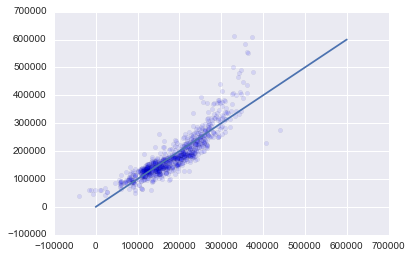

In [36]:
plt.scatter(test_set_pred2,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))

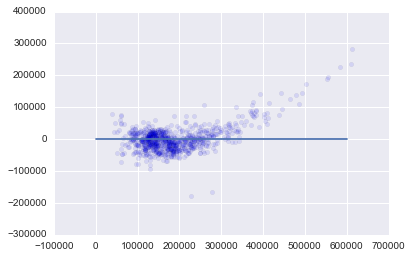

In [37]:
plt.scatter(y_test, y_test-test_set_pred2,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))

In [38]:
#RMSE
np.sqrt(np.mean((test_set_pred2 - y_test)**2))

37638.850393449371

In [39]:
#MAD
(np.mean(np.abs(test_set_pred2 - y_test)))

25686.833930193559

Next, let us try using all of the variables (in the reduced selection)

In [40]:
lr_model3 = LinearRegression()
lr_model3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
list(zip(X_train.columns,lr_model3.coef_))

[('Lot Area', 1.400432021865853),
 ('Overall Qual', 20121.193329127571),
 ('Overall Cond', 5375.7667721426005),
 ('Year Built', 555.79521078181972),
 ('Year Remod/Add', 125.75290884195184),
 ('Gr Liv Area', 73.085251802197547),
 ('Full Bath', -9259.533699227477),
 ('Bedroom AbvGr', -10307.987722698343),
 ('Fireplaces', 4668.0066075468876),
 ('Garage Cars', 9931.5700093968971)]

In [42]:
test_set_pred3 = lr_model3.predict(X_test)

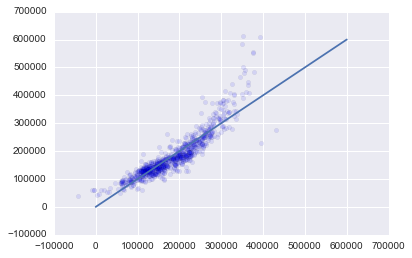

In [43]:
plt.scatter(test_set_pred3,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))

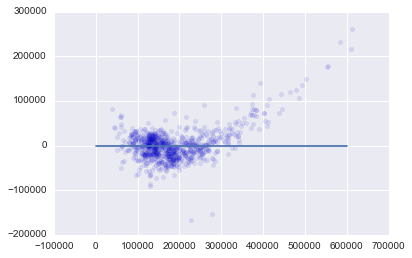

In [44]:
plt.scatter(y_test,y_test-test_set_pred3,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))

In [45]:
#RMSE
np.sqrt(np.mean((test_set_pred3 - y_test)**2))

34427.46045160028

In [46]:
#MAD
(np.mean(np.abs(test_set_pred3 - y_test)))

23113.614375666726

### Adding a quadratic factor
Again, we see that our residual plot indicates some non-linearity.

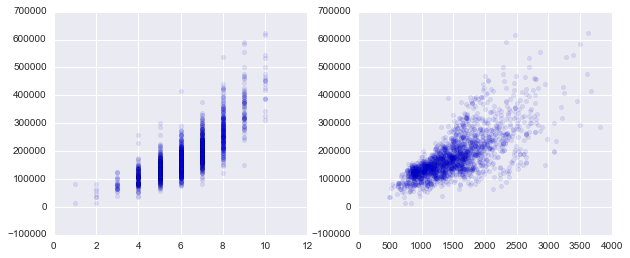

In [47]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].scatter(X_train['Overall Qual'],y_train, alpha = .1)

ax[1].scatter(X_train['Gr Liv Area'],y_train, alpha = .1)

Let's try adding in `'Overall Qual'` *squared* as a predictor variable

In [48]:
X['OQ2'] = X['Overall Qual']**2
X.columns

Index(['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
       'Fireplaces', 'Garage Cars', 'OQ2'],
      dtype='object')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [50]:
lr_model4 = LinearRegression()
lr_model4.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
list(zip(X_train.columns,lr_model4.coef_))

[('Lot Area', 1.3215582849561796),
 ('Overall Qual', -56025.994541560358),
 ('Overall Cond', 9050.9326196274287),
 ('Year Built', 650.9987836022492),
 ('Year Remod/Add', 76.507361162360098),
 ('Gr Liv Area', 63.084029601690503),
 ('Full Bath', -6605.5685951627238),
 ('Bedroom AbvGr', -4945.5724221705404),
 ('Fireplaces', 7564.6756149866687),
 ('Garage Cars', 8379.3392356713957),
 ('OQ2', 6158.6325800777695)]

In [52]:
test_set_pred4 = lr_model4.predict(X_test)

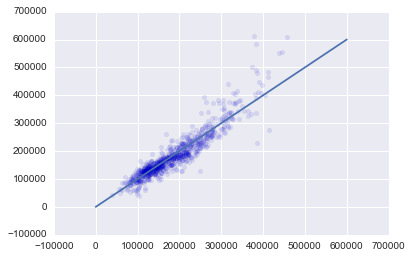

In [53]:
plt.scatter(test_set_pred4,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))

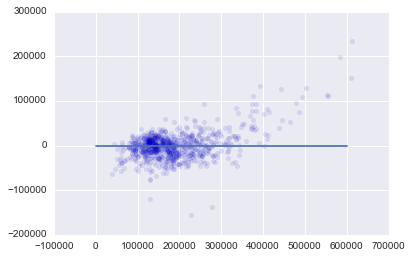

In [54]:
plt.scatter(y_test,y_test-test_set_pred4,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))

In [55]:
#RMSE
np.sqrt(np.mean((test_set_pred4 - y_test)**2))

29882.138332372979

In [56]:
#MAD
(np.mean(np.abs(test_set_pred4 - y_test)))

20137.742795243688